 ASSIGNMENT - 3  
                              

 Student name : G krithiksha
 Batch : B10-4A6E

1.Download the dataset: Dataset

my dataset is downloaded in the path : C:\Users\Acer\Downloads\Flowers-Dataset\flowers

In [1]:
ls


 Volume in drive C is windows 10
 Volume Serial Number is 083C-F2B1

 Directory of C:\Users\Acer\IBM --TRAINING SESSION\IBM - assignment-3

10/11/2022  09:16 PM    <DIR>          .
10/11/2022  09:16 PM    <DIR>          ..
10/11/2022  09:16 PM    <DIR>          .ipynb_checkpoints
10/11/2022  09:16 PM            29,443 ASSIGNMENT  3 - KRITHIKSHA(IBM).ipynb
10/08/2022  02:31 PM       111,499,392 flowers.h5
10/08/2022  03:45 PM            18,300 KRITHIKSHA- CNN PREDICTION OF FLOWERS.ipynb
10/05/2022  10:59 AM            25,183 rose.jpg
10/11/2022  09:16 PM                72 Untitled.ipynb
               5 File(s)    111,572,390 bytes
               3 Dir(s)  46,742,405,120 bytes free


2.IMAGE AUGMENTATION

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(r"C:\Users\Acer\Downloads\Flowers-Dataset\flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [6]:
x_test=test_datagen.flow_from_directory(r"C:\Users\Acer\Downloads\Flowers-Dataset\flowers",target_size=(64,64),
                                                            class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


3,4. CREATE MODEL: Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [7]:
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [9]:
model=Sequential()

In [10]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(300,activation='relu'))

In [14]:
model.add(Dense(300,activation='relu'))

In [15]:
model.add(Dense(5,activation="softmax"))

5.COMPILE THE MODEL

In [16]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [17]:
len(x_train)

180

In [18]:
len(x_test)

180

6.FIT THE MODEL

In [19]:
model.fit(x_train,epochs=5,validation_data=x_test,steps_per_epoch=len(x_train),validation_steps=len(x_test))

Epoch 1/5
180/180 [==============================] - 379s 2s/step - loss: 1.2657 - accuracy: 0.4681 - val_loss: 1.0761 - val_accuracy: 0.5798
Epoch 2/5
180/180 [==============================] - 138s 767ms/step - loss: 1.0503 - accuracy: 0.5784 - val_loss: 0.9687 - val_accuracy: 0.6115
Epoch 3/5
180/180 [==============================] - 128s 711ms/step - loss: 0.9889 - accuracy: 0.6092 - val_loss: 0.8925 - val_accuracy: 0.6461
Epoch 4/5
180/180 [==============================] - 123s 683ms/step - loss: 0.9120 - accuracy: 0.6426 - val_loss: 0.8636 - val_accuracy: 0.6720
Epoch 5/5
180/180 [==============================] - 123s 684ms/step - loss: 0.8624 - accuracy: 0.6613 - val_loss: 0.8027 - val_accuracy: 0.6933


7.SAVE THE MODEL

In [20]:
model.save("flower1.h5")

8.TEST THE MODEL

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
import numpy as np

In [22]:
model=load_model("flower1.h5")

In [23]:
img=image.load_img("rose.jpg",target_size=(64,64))

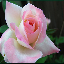

In [24]:
img

In [25]:
type(img)

PIL.Image.Image

In [26]:
x = image.img_to_array(img)

In [28]:
x

array([[[ 56., 102.,  89.],
        [ 46.,  82.,  68.],
        [ 39.,  69.,  57.],
        ...,
        [ 13.,  47.,  31.],
        [ 18.,  46.,  32.],
        [ 17.,  39.,  27.]],

       [[ 65., 125.,  99.],
        [ 31.,  53.,  40.],
        [ 53.,  65.,  61.],
        ...,
        [ 28.,  33.,  27.],
        [ 37.,  30.,  22.],
        [ 35.,  32.,  27.]],

       [[ 22.,  27.,  23.],
        [ 18.,  24.,  20.],
        [ 50.,  74.,  61.],
        ...,
        [ 31.,  30.,  25.],
        [ 36.,  31.,  27.],
        [ 32.,  29.,  24.]],

       ...,

       [[ 14.,  36.,  15.],
        [ 38.,  65.,  46.],
        [ 26.,  34.,  19.],
        ...,
        [ 21.,  33.,  21.],
        [ 19.,  56.,  25.],
        [ 29.,  62.,  35.]],

       [[ 36.,  65.,  43.],
        [ 18.,  27.,  10.],
        [ 20.,  33.,  15.],
        ...,
        [ 16.,  43.,  24.],
        [ 19.,  53.,  28.],
        [ 15.,  38.,  22.]],

       [[  0.,  28.,  12.],
        [  1.,  27.,  16.],
        [  0.,  

In [27]:
x.shape

(64, 64, 3)

In [29]:
x = np.expand_dims(x,axis=0)

In [30]:
x.shape

(1, 64, 64, 3)

In [31]:
pred_prob = model.predict(x)

1/1 [==============================] - 1s 604ms/step


In [32]:
pred_prob

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [33]:
class_name=["daisy","dandelio","rose","sunflower","tulip"]
pred_id = pred_prob.argmax(axis=1)[0]

In [34]:
pred_id

2

In [35]:
print("predicted animal is ",str(class_name[pred_id]))

predicted animal is  rose
